#Inequality Indexes according to the U.S. Census Bureau in 2019


In [2]:
# importing the libraries
import numpy as np
import array
from matplotlib import pyplot as plt
from ineqpy.inequality import gini

float64


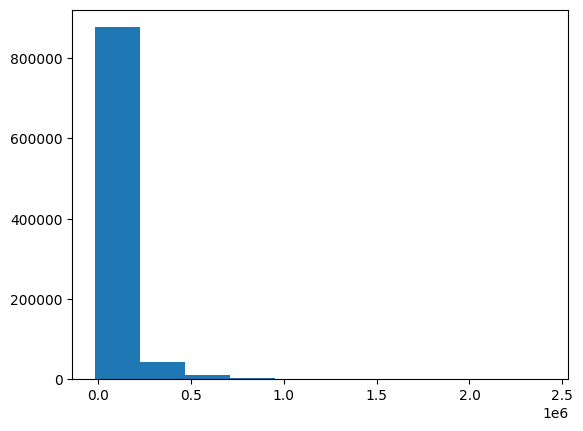

In [3]:
# fetch the data and visualizing it
your_array = np.loadtxt(
    "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/us_household_incomes.txt"
)
plt.hist(your_array)
print(your_array.dtype.name)


This is not a normal distribution, not uniform either. It is not equal, the graph is right skewed meaning there are top earners condensed in that range.

In [4]:
# Calculating the gini index for all the hosueholds below the poverty line
results = {}
ex4_gini = gini(your_array)
poverty_line = 20000
ex4_share_below_poverty = your_array[your_array < poverty_line]

results["ex4_share_below_poverty"] = ex4_share_below_poverty.size / your_array.size
print(f"The gini index for the US below the poverty line is: {ex4_gini:.3f}")
results["ex4_gini"] = ex4_gini

The gini index for the US below the poverty line is: 0.481


We compared the gini index of the US to other countries and it at position 20 from the top, coming in close to countries like Honduras. The gini index came in at 0.48.

In [5]:
# Calculating the gini index for households below 40k and 30k
copy1_a = your_array.copy()
copy1_b = your_array.copy()
copy1_a[copy1_a < 40000] += 5000
ex6_gini_policy_a = gini(copy1_a)
copy1_b[copy1_b < 30000] += 7000
ex6_gini_policy_b = gini(copy1_b)
results["ex6_gini_policy_a"] = ex6_gini_policy_a
results["ex6_gini_policy_b"] = ex6_gini_policy_b
# Storing the results of the lower gini index policy in results
results["ex6_gini_which_reduced_more"] = "Policy B"
experiment1 = your_array.copy()
print(f"The Gini Index of Policy A is: {ex6_gini_policy_a: .3f}")
print(f"The Gini Index of Policy B is: {ex6_gini_policy_b: .3f}")

The Gini Index of Policy A is:  0.460
The Gini Index of Policy B is:  0.458


Policy B is lower so it is a better policy and more equal.

In [6]:
# Taking 5% tax from all people with annual income above $250k
copy3 = your_array.copy()
copy3[copy3 > 250000] *= 0.95
ex7_gini_policy_c = gini(copy3)
print(f"The Gini Index of Policy C is: {ex7_gini_policy_c:.3f}")
results["ex7_gini_policy_c"] = ex7_gini_policy_c

The Gini Index of Policy C is: 0.476


This gini index is way lower than Policy A and B  which makes it a more equal policy.

In [7]:
# Summing the total tax collected from all people with annual income above $250k
ex8_policy_d = sum(your_array[your_array > 250000] * 0.05)
print(f"The Sum of the tax collected is: {ex8_policy_d:.3f}")
results["ex8_revenue_raised"] = ex8_policy_d

The Sum of the tax collected is: 929623340.850


In [8]:
# Calculating the average tax distrubted to people with annual income less than $30k
ex9 = your_array[your_array < 30000]
avg = ex8_policy_d / ex9.size
results["ex9_transfers"] = avg

In [9]:
# Assigning the tax collected to the lower income households
copy2 = your_array.copy()
copy2[copy2 > 250000] *= 0.95
copy2[copy2 < 30000] += avg
ex10_gini_policy_d = gini(copy2)
print(f"The Gini Index of Policy D is: {ex10_gini_policy_d:.3f}")
results["ex10_gini_policy_d"] = ex10_gini_policy_d

The Gini Index of Policy D is: 0.462


In [10]:
# Calculating the average tax distrubted to people with annual income less than $40k
copy4 = your_array.copy()
ex11 = copy4[copy4 < 40000]
avg = ex8_policy_d / ex11.size
copy4[copy4 > 250000] *= 0.95
copy4[copy4 < 40000] += avg
# Assigning the tax collected to the lower income households
ex11_gini_policy_e = gini(copy4)
print(f"The Gini Index of Policy E is: {ex11_gini_policy_e:.3f}")
results["ex11_gini_policy_e"] = ex11_gini_policy_e

The Gini Index of Policy E is: 0.463


Policy D is much better as it has a gini index of 0.462. It is smaller than Gini index of Policy E which is 0.468.

In [11]:
# Storing the recommended policy to results
results["ex12_policy_recommendation"] = "Policy D"